# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

# YOUR CODE HERE
df = pd.read_csv(adultDataSet_filename, header = 0)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The data set I have chosen is the Adult Census data set. 

2. I will be predicting whether a person in the census has an income > 50K. The label is income_over_50K (the income_binary feature renamed, with boolean values according to the values in the income_binary feature). 

4. This is a supervised learning problem, more specifically a binary-classification problem.

5. My features are: age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex_selfID, capital-gain, capital-loss, hours-per-week, native-country, and income_binary.

6. This is an important problem because a company could use this to inform their advertising strategies and maximize their impact/effectiveness. Having a model that predicts whether a person makes over 50K will allow the company to target future customers who would be more likely to afford and purchase the company's products, so the company can focus most of their advertising efforts on people predicted to make over 50K. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
print(df.shape)

print(list(df.columns))

(32561, 15)
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income_binary']


In [4]:
# YOUR CODE HERE
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


In [5]:
# YOUR CODE HERE
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [6]:
# YOUR CODE HERE
df.isnull().sum()

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [7]:
# YOUR CODE HERE
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex_selfID            2
capital-gain        106
capital-loss         92
hours-per-week       94
native-country       41
income_binary         2
dtype: int64

In [8]:
# YOUR CODE HERE\
df['income_binary'].value_counts()

<=50K    24720
>50K      7841
Name: income_binary, dtype: int64

In [9]:
# YOUR CODE HERE
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K


In [10]:
# YOUR CODE HERE
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076267,0.036761,0.124901,0.057545,0.067066
fnlwgt,-0.076267,1.000000,-0.043195,-0.002234,-0.010252,-0.018130
education-num,0.036761,-0.043195,1.000000,0.167089,0.079923,0.147256
capital-gain,0.124901,-0.002234,0.167089,1.000000,-0.055138,0.101594
capital-loss,0.057545,-0.010252,0.079923,-0.055138,1.000000,0.054500
hours-per-week,0.067066,-0.018130,0.147256,0.101594,0.054500,1.000000


In [11]:
# YOUR CODE HERE
df.corr()['capital-loss']

age               0.057545
fnlwgt           -0.010252
education-num     0.079923
capital-gain     -0.055138
capital-loss      1.000000
hours-per-week    0.054500
Name: capital-loss, dtype: float64

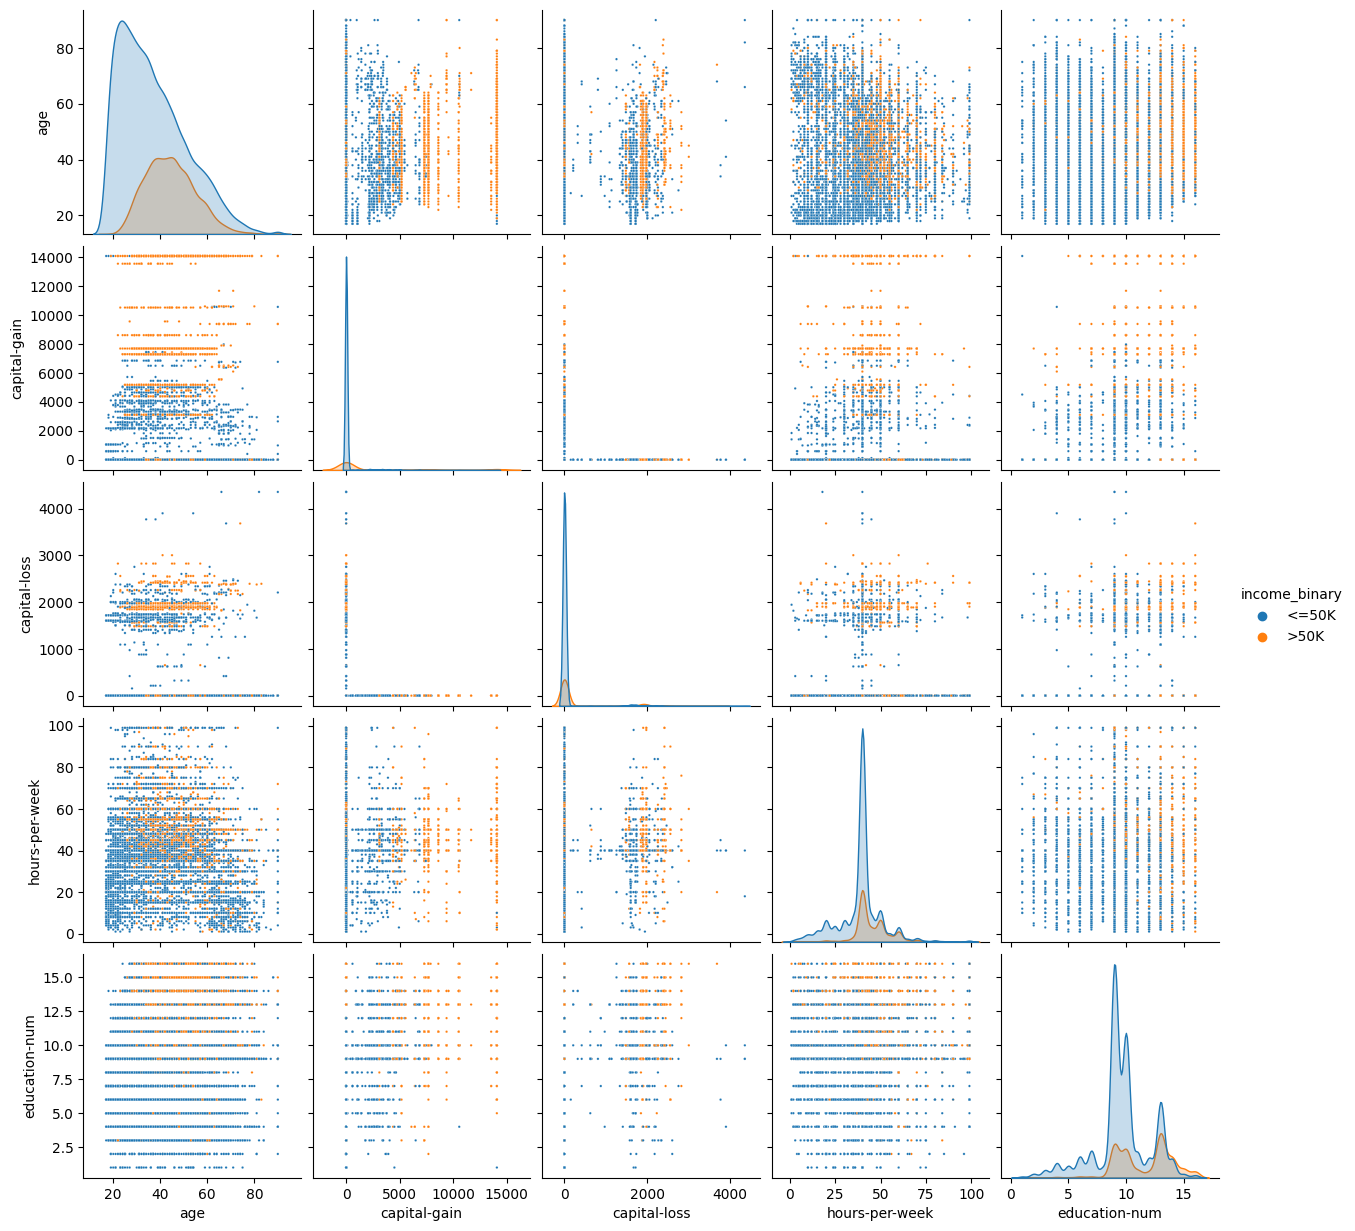

In [12]:
# YOUR CODE HERE
df_sub = df[['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num','income_binary']].copy() 
sns.pairplot(data=df_sub, hue = 'income_binary', plot_kws={'s':3})

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I have a new feature list, and the features that I am choosing to keep (besides the 'income_binary' label) are: 'age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'capital-gain', 'capital-loss', 'hours-per-week', and 'native-country'. I've chosen to keep both 'relationship' and 'marital-status' because although the two features are slightly correlated, they aren't identical and have some differences between them. On the other hand, I am removing the following features: 'fnlwgt', 'education', 'sex_selfID', and 'race'; 'fnlwgt' doesn't provide any information in regards to the label as it mainly serves as a person's identification number, 'education' is just the categorical/String representation of the 'education-num', so I opted to keep the 'education-num' feature instead for convenience and so I didn't have to one hot-encode 'education', and both 'sex_selfID' and 'race' might introduce some bias into the model and cause it to discriminate against specific races or genders, so I chose to remove these columns to try to make my model as fair as possible to people of all groups and backgrounds.

2. The different data preparation techniques that I will use to prepare my data for modeling are keeping only essential features and removing the unnecessary/irrelevant ones, detecting and replacing missing values in both numerical and categorical features, detecting outliers and performing winsorization on them, one hot-encoding the categorical features, and lastly, scaling the numerical data to normalize each column to have zero mean and unit standard deviation. Since I want to predict whether a person's income is over 50K, I will first begin the data preprocessing steps by transforming the 'income_binary' column, which includes either "<=50K" or ">50K", values to become 'income_over_50K', so that this can be the label and will only have the corresponding True/False values. Next, I will only keep the most essential features in my model - 'age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country' - as well as the 'income_over_50K' label. Then, I will determine whether the Census dataset contains any missing values, and where these missing values are located, replacing those missing values accordingly. For missing values in numerical features, I will replace them with the mean value of that feature, and for missing values in categorical features, I will replace them with the String "Unknown". I debated dropping the rows containing missing values in categorical features, but ultimately replacing them with "Unknown" is the best choice as it ensures I don't remove any information that could be important to training my model. Next, for each of the numerical features, I will detect if there exist any outliers by visualizing a boxplot using Matplotlib and Seaborn, and winsorizing all these outliers. I will then one hot-encode all the categorical features in the processed dataset; all of the categorical features have a pretty manageable number of unique values that I need to one hot-encode, but the 'native-country' column contains over 40 unique values (which will be too many to one hot-encode), so for that specific column, I will only hot one-encode the top 10 most frequent values. Lastly, I will scale the numerical data to normalize each column to have zero mean and unit standard deviation, so the performance of the Logistic Regression model may not potentially be skewed by the non-normalization.

3. For this lab, I have decided to train and evaluate multiple different models to determine which one yields the best performance, using evaluation metrics like AUC, log loss, and accuracy scores. Out of all the models I have trained on my dataset, I will then perform model selection to select the best performing one. The models I will be training and evaluating are: Logistic Regression Classifier, Decision Tree Classifier, Random Forest Classifier, and Gradient Boosted Decision Tree Classifier. For all the different types of Classifiers, I will be training two of each: one classifier trained with default hyperparameters, and the other with the best hyperparameter values found using GridSearchCV, then conducting analysis on which of the two performs better using the evaluation metrics.

4. My plan to train my model is to first create labeled examples from the DataFrame by assigning y to the label, that is the 'income_over_50K' column and assigning X to the features, or the rest of columns the DataFrame excluding the label. I will then split the data set into training and testing sets, setting aside 15% of the dataset to be for testing and 85% for training. I will build my models using Scikit-learn and fit them to my training data. I will analyze the performance by models by using the evaluation metrics of AUC, log loss, and accuracy score, with high AUC, low log loss, and a high accuracy score representing the best model. I will improve my model by conducting analysis on how having the top k features impacts the AUC, log loss, and accuracy scores and adjusting my models accordingly, and building new models using different Classifiers to ultimately find the best performing model on this dataset.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [13]:
# YOUR CODE HERE
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [14]:
# Data Preparation and feature engineering

# renaming and adjusting 'income_binary' column to be 'income_over_50K' label
df.rename(columns={'income_binary': 'income_over_50K'}, inplace=True)
df['income_over_50K'] = (df['income_over_50K'] == '>50K').astype(bool)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_over_50K
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,False
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,False
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,False
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,False
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,False
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,False
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,False
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,True
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,True
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,True


In [15]:
# keeping essential features
keep_columns = ['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income_over_50K']
df = df[keep_columns]

df

,age,workclass,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income_over_50K
0,39.0,State-gov,13,Never-married,Adm-clerical,Not-in-family,2174,0,40.0,United-States,False
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13.0,United-States,False
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40.0,United-States,False
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40.0,United-States,False
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40.0,Cuba,False
...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,12,Married-civ-spouse,Tech-support,Wife,0,0,38.0,United-States,False
32557,40.0,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40.0,United-States,True
32558,58.0,Private,9,Widowed,Adm-clerical,Unmarried,0,0,40.0,United-States,False
32559,22.0,Private,9,Never-married,Adm-clerical,Own-child,0,0,20.0,United-States,False


In [16]:
# replace missing values in numerical features
mean_age = df['age'].mean()
df['age'].fillna(value=mean_age, inplace=True)

mean_hours = df['hours-per-week'].mean()
df['hours-per-week'].fillna(value=mean_hours, inplace=True)

df.isnull().sum()

age                   0
workclass          1836
education-num         0
marital-status        0
occupation         1843
relationship          0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income_over_50K       0
dtype: int64

In [17]:
# replace missing values in categorical features with "Unknown"
df['workclass'].fillna(value="Unknown", inplace=True)
df['occupation'].fillna(value="Unknown", inplace=True)
df['native-country'].fillna(value="Unknown", inplace=True)

df.isnull().sum()

age                0
workclass          0
education-num      0
marital-status     0
occupation         0
relationship       0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_over_50K    0
dtype: int64

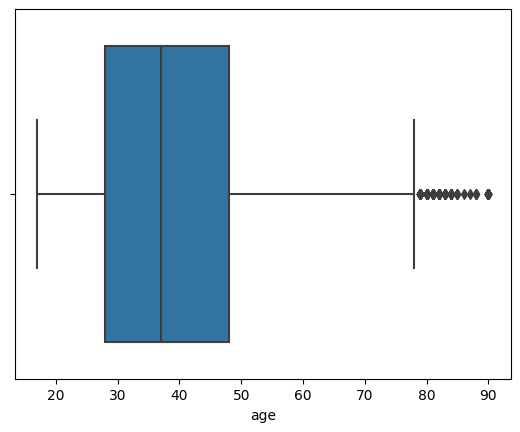

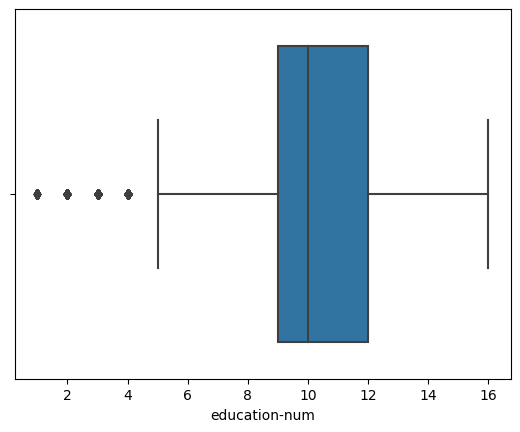

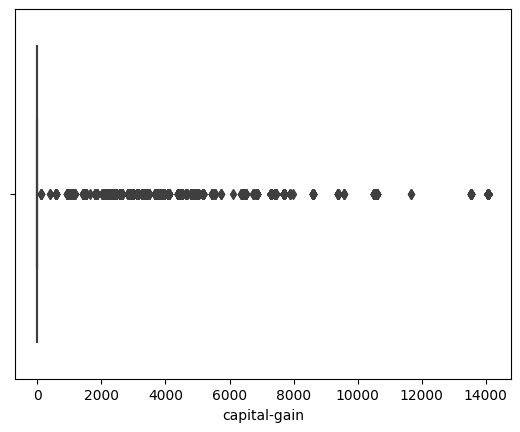

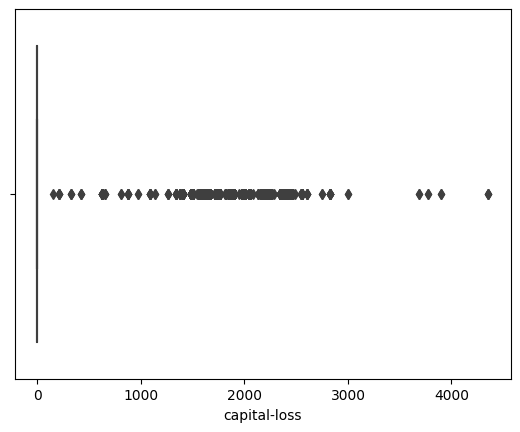

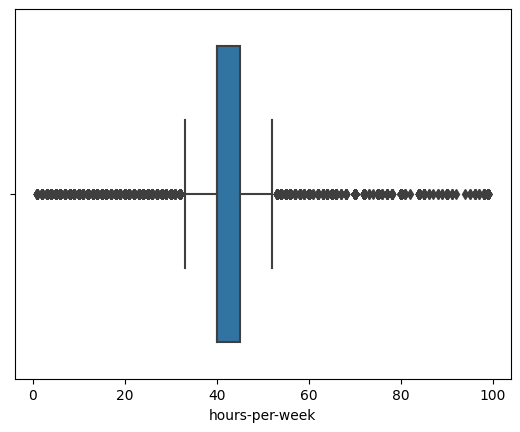

In [18]:
# detecting outliers 
sns.boxplot(x = df['age'])
plt.show()

sns.boxplot(x = df['education-num'])
plt.show()

sns.boxplot(x = df['capital-gain'])
plt.show()

sns.boxplot(x = df['capital-loss'])
plt.show()

sns.boxplot(x = df['hours-per-week'])
plt.show()

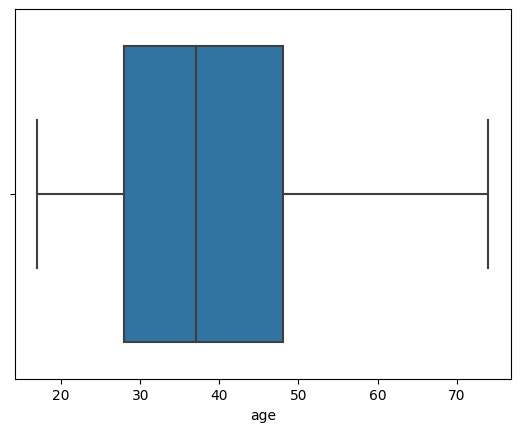

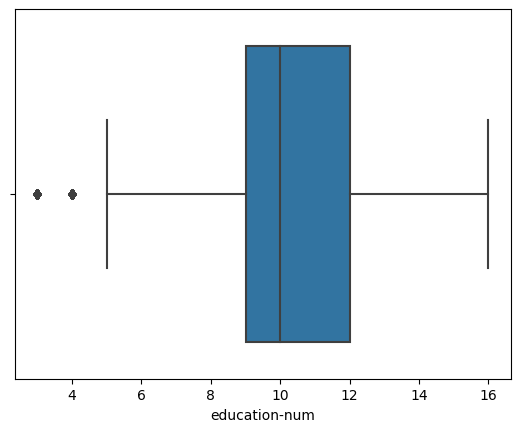

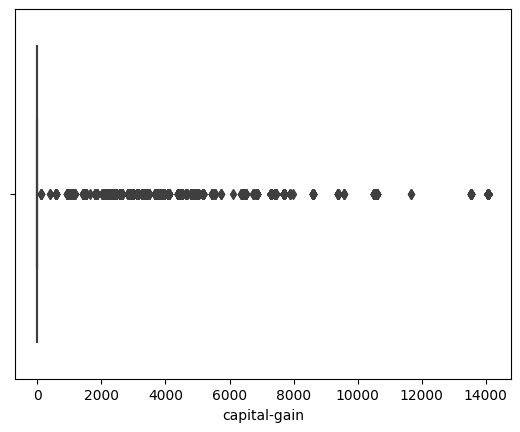

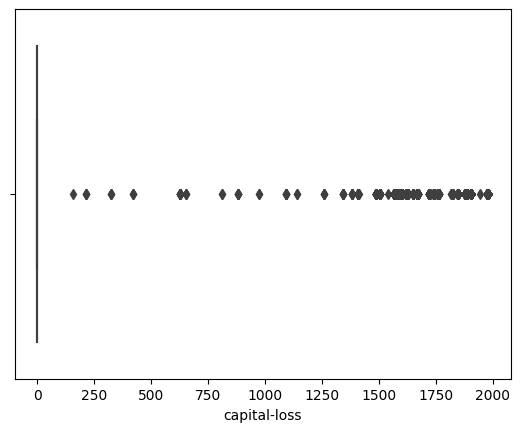

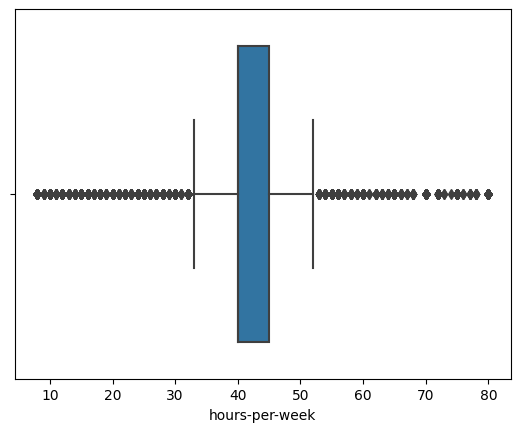

In [19]:
# applying winsorization on outliers

df = df.copy()

df['age'] = stats.mstats.winsorize(df['age'], limits=[0.01, 0.01])
df['education-num'] = stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])
df['capital-gain'] = stats.mstats.winsorize(df['capital-gain'], limits=[0.01, 0.01])
df['capital-loss'] = stats.mstats.winsorize(df['capital-loss'], limits=[0.01, 0.01])
df['hours-per-week'] = stats.mstats.winsorize(df['hours-per-week'], limits=[0.01, 0.01])

sns.boxplot(x = df['age'])
plt.show()

sns.boxplot(x = df['education-num'])
plt.show()

sns.boxplot(x = df['capital-gain'])
plt.show()

sns.boxplot(x = df['capital-loss'])
plt.show()

sns.boxplot(x = df['hours-per-week'])
plt.show()

In [20]:
# one-hot encode categorical features and drop the original columns

# determining the categorical features that need to be one hot-encoded
to_encode = list(df.select_dtypes(include=['object']).columns)
print(to_encode)

['workclass', 'marital-status', 'occupation', 'relationship', 'native-country']


In [21]:
# One Hot-Encoding the 'native-country' column and only one hot-encoding its top 10 values

# getting the top 10 most frequent values in the 'native-country' column and saving them in a list
top_10_native_countries = list(df['native-country'].value_counts().head(10).index)

# one hot-encoding the top 10 values in the 'native-country' column
for i in top_10_native_countries:
    df['native-country' + '_' + i] = np.where(df['native-country'] == i, 1, 0)

# removing the 'native-country' column
df = df.drop('native-country', axis=1)
to_encode.remove('native-country')

list(df.columns)

['age',
 'workclass',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income_over_50K',
 'native-country_United-States',
 'native-country_Mexico',
 'native-country_Unknown',
 'native-country_Philippines',
 'native-country_Germany',
 'native-country_Canada',
 'native-country_Puerto-Rico',
 'native-country_El-Salvador',
 'native-country_India',
 'native-country_Cuba']

In [22]:
# one hot-encoding the remaining categorical features
for i in to_encode:
    df_one_hot_encode = pd.get_dummies(df[i], prefix = i)
    df = df.join(df_one_hot_encode)
    # remove original column from dataframe
    df.drop(i, axis = 1, inplace=True)
    
list(df.columns)

['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income_over_50K',
 'native-country_United-States',
 'native-country_Mexico',
 'native-country_Unknown',
 'native-country_Philippines',
 'native-country_Germany',
 'native-country_Canada',
 'native-country_Puerto-Rico',
 'native-country_El-Salvador',
 'native-country_India',
 'native-country_Cuba',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Unknown',
 'workclass_Without-pay',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation

In [23]:
print(df.shape)

(32561, 53)


In [24]:
# scale numerical data to normalize each column to have zero mean and unit standard deviation

scaler = StandardScaler()

df_to_scale = df.select_dtypes(include = 'number')

transformed_data = scaler.fit_transform(df_to_scale)

df_scaled = pd.DataFrame(data = transformed_data, columns = df_to_scale.columns, index = df_to_scale.index)

# df = df.copy()
df[df_to_scale.columns] = df_scaled
df

,age,education-num,capital-gain,capital-loss,hours-per-week,income_over_50K,native-country_United-States,native-country_Mexico,native-country_Unknown,native-country_Philippines,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_Unknown,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0.034495,1.142699,0.643799,-0.218828,-0.033907,False,0.340954,-0.141934,-0.135023,-0.078218,...,-0.355316,-0.171279,-0.227104,-0.244944,-0.825333,1.708991,-0.17625,-0.429346,-0.344032,-0.224927
1,0.852098,1.142699,-0.254491,-0.218828,-2.305919,False,0.340954,-0.141934,-0.135023,-0.078218,...,-0.355316,-0.171279,-0.227104,-0.244944,1.211632,-0.585141,-0.17625,-0.429346,-0.344032,-0.224927
2,-0.039832,-0.427466,-0.254491,-0.218828,-0.033907,False,0.340954,-0.141934,-0.135023,-0.078218,...,-0.355316,-0.171279,-0.227104,-0.244944,-0.825333,1.708991,-0.17625,-0.429346,-0.344032,-0.224927
3,1.075081,-1.212549,-0.254491,-0.218828,-0.033907,False,0.340954,-0.141934,-0.135023,-0.078218,...,-0.355316,-0.171279,-0.227104,-0.244944,1.211632,-0.585141,-0.17625,-0.429346,-0.344032,-0.224927
4,-0.783107,1.142699,-0.254491,-0.218828,-0.033907,False,-2.932948,-0.141934,-0.135023,-0.078218,...,-0.355316,-0.171279,-0.227104,-0.244944,-0.825333,-0.585141,-0.17625,-0.429346,-0.344032,4.445891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.857435,0.750158,-0.254491,-0.218828,-0.202205,False,0.340954,-0.141934,-0.135023,-0.078218,...,-0.355316,5.838432,-0.227104,-0.244944,-0.825333,-0.585141,-0.17625,-0.429346,-0.344032,4.445891
32557,0.108823,-0.427466,-0.254491,-0.218828,-0.033907,True,0.340954,-0.141934,-0.135023,-0.078218,...,-0.355316,-0.171279,-0.227104,-0.244944,1.211632,-0.585141,-0.17625,-0.429346,-0.344032,-0.224927
32558,1.446718,-0.427466,-0.254491,-0.218828,-0.033907,False,0.340954,-0.141934,-0.135023,-0.078218,...,-0.355316,-0.171279,-0.227104,-0.244944,-0.825333,-0.585141,-0.17625,-0.429346,2.906704,-0.224927
32559,-1.229073,-0.427466,-0.254491,-0.218828,-1.716879,False,0.340954,-0.141934,-0.135023,-0.078218,...,-0.355316,-0.171279,-0.227104,-0.244944,-0.825333,-0.585141,-0.17625,2.329125,-0.344032,-0.224927


## Model Training

In [25]:
# creating labeled examples from df, assigning the label to y and features to X
y = df['income_over_50K']
X = df.drop(columns = 'income_over_50K', axis = 1)

# split data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 1234)

## Logisitic Regression Classifier

### Training a LR model with default hyperparameter values (C = 1.0)

In [26]:
# training model with default hyperparameter values
lg_model_default = LogisticRegression(max_iter=1000)
lg_model_default.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
proba_predictions_default = list(lg_model_default.predict_proba(X_test)[:, 1])
l_loss_default = log_loss(y_test, proba_predictions_default)

class_label_predictions_default = lg_model_default.predict(X_test)
acc_score_default = accuracy_score(y_test, class_label_predictions_default)


# evaluate accuracy of model using confusion matrix
c_m_default = confusion_matrix(y_test, class_label_predictions_default, labels=[True, False])

pd.DataFrame(
c_m_default,
columns=['Predicted: Income is >50K', 'Actual: Income is <=50K'],
index=['Actual: Income is >50K', 'Actual: Income is <=50K']
)

,Predicted: Income is >50K,Actual: Income is <=50K
Actual: Income is >50K,668,477
Actual: Income is <=50K,277,3463


### Training a LR model with the best C hyperparameter value

In [29]:
cs = [10**i for i in range(-5, 5)]
param_grid = {'C' : cs}

print('Running Grid Search...')

lg_model = LogisticRegression(max_iter = 1000)

grid = GridSearchCV(lg_model, param_grid, cv = 5)

grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [30]:
# determining best hyperparameter value C

best_C = grid_search.best_estimator_.C

best_C

0.01

In [31]:
# training optimal logistic regression model

lg_model_best = LogisticRegression(C = best_C, max_iter = 1000)
lg_model_best.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000)

In [32]:
proba_predictions_best = list(lg_model_best.predict_proba(X_test)[:, 1])
l_loss_best = log_loss(y_test, proba_predictions_best)

class_label_predictions_best = lg_model_best.predict(X_test)
acc_score_best = accuracy_score(y_test, class_label_predictions_best)

# evaluate accuracy of model using confusion matrix
c_m_best = confusion_matrix(y_test, class_label_predictions_best, labels=[True, False])

pd.DataFrame(
c_m_best,
columns=['Predicted: Income is >50K', 'Actual: Income is <=50K'],
index=['Actual: Income is >50K', 'Actual: Income is <=50K']
)

,Predicted: Income is >50K,Actual: Income is <=50K
Actual: Income is >50K,664,481
Actual: Income is <=50K,271,3469


In [33]:
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)

precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)

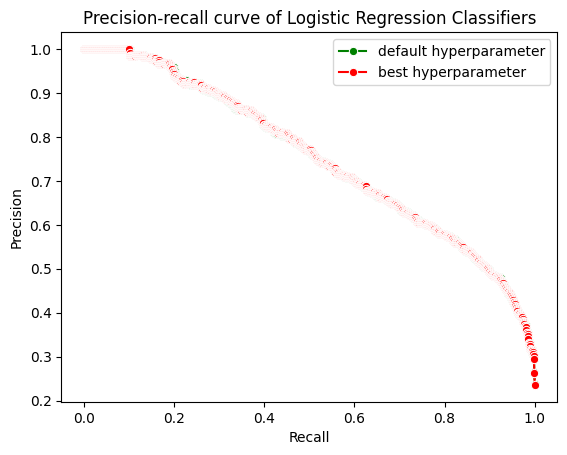

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x = recall_default, y = precision_default, color = 'green', marker = 'o', label = 'default hyperparameter')
sns.lineplot(x = recall_best, y = precision_best, color = 'red', marker = 'o', label = 'best hyperparameter')

plt.title("Precision-recall curve of Logistic Regression Classifiers")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

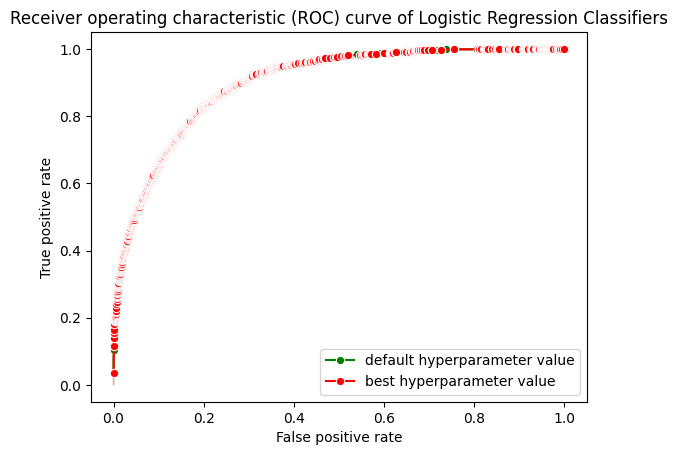

In [35]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test, proba_predictions_default)

fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x = fpr_default, y = tpr_default, color = 'green', marker = 'o', label = 'default hyperparameter value')
sns.lineplot(x = fpr_best, y = tpr_best, color = 'red', marker = 'o', label = 'best hyperparameter value')

plt.title("Receiver operating characteristic (ROC) curve of Logistic Regression Classifiers")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [36]:
# logistic regression model evaluation metrics

auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)

print('AUC of default model: ' + str(auc_default))
print('AUC of model with best hyperparameter: ' + str(auc_best))
print()

print('Log loss of default model: ' + str(l_loss_default))
print('Log loss of model with best hyperparameter: ' + str(l_loss_best))
print()

print('Accuracy score of default model: ' + str(acc_score_default))
print('Accuracy score of model with best hyperparameter: ' + str(acc_score_best))

AUC of default model: 0.8982140438549376
AUC of model with best hyperparameter: 0.8981785489106321

Log loss of default model: 0.3259699892214959
Log loss of model with best hyperparameter: 0.32576783080596156

Accuracy score of default model: 0.8456499488229273
Accuracy score of model with best hyperparameter: 0.8460593654042988


Based on the evaluation metrics of AUC, log loss, and accuracy scores, the tuned Logistic Regression model with the best value for the C regularization hyperparameter (C = 0.01) performs slightly better than the Logistic Regression model with default hyperparameter values (C = 1.0), though the difference between the two Classifiers is extremely small. The AUC and accuracy scores of both models are pretty high (> 0.5), while the log loss is decently low (< 0.5). 

I will analyze how the better model's performance is impacted by removing or adding more features to the dataset in the next code block in order to determine whether the number of features I currently have (52) maximizes the model's performance - or is there a better number of features I should use to improve my model. 

In [37]:
k = 47
selector = SelectKBest(f_classif, k = k)
selector.fit(X, y)
filter = selector.get_support()
top_5_features = X.columns[filter]

print("Best " + str(k) + " features:")
print(top_5_features)

new_X_train = X_train[top_5_features]
new_X_test = X_test[top_5_features]

model = LogisticRegression(C = best_C, max_iter = 1000)

model.fit(new_X_train, y_train)

proba_predictions = list(model.predict_proba(new_X_test)[:, 1])
l_loss = log_loss(y_test, proba_predictions)

class_label_predictions = model.predict(new_X_test)
acc_score = accuracy_score(y_test, class_label_predictions)


fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
auc_result = auc(fpr, tpr)

print()
print('AUC: ' + str(auc_result))
print()
print('Log loss: ' + str(l_loss))
print()
print('Accuracy score: ' + str(acc_score))
print()

Best 47 features:
Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country_United-States',
       'native-country_Mexico', 'native-country_Philippines',
       'native-country_Germany', 'native-country_Puerto-Rico',
       'native-country_El-Salvador', 'native-country_India',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Unknown', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       '

### Findings of tweaking the number of features used: 

#### k = 52 (number of features I used - maximum number of features I have after dropping unncessary ones):

AUC: 0.8981785489106321

Log loss: 0.32576783080596156

Accuracy score: 0.8460593654042988

#### k = 50 (decreasing number of features):

AUC: 0.8982528080704294

Log loss: 0.3257137313166069

Accuracy score: 0.8462640736949847

#### k = 47 (decreasing number of features):

AUC: 0.898289353851902

Log loss: 0.3256612002905544

Accuracy score: 0.8460593654042988

#### k = 45 (decreasing number of features):

AUC: 0.8981293930831563

Log loss: 0.3258702992564683

Accuracy score: 0.8464687819856704

#### k = 30 (decreasing number of features):

AUC: 0.8981255400135442

Log loss: 0.32550403028946234

Accuracy score: 0.8454452405322416

#### k = 15 (decreasing number of features):

AUC: 0.8928272190178176

Log loss: 0.3323655660424892

Accuracy score: 0.8415557830092119

#### k = 5 (decreasing number of features):

AUC: 0.8704501085865072

Log loss: 0.35826250962672745

Accuracy score: 0.8356192425793245

### Analysis of Logistic Regression Classifier: 

After tweaking the k-value of the Logistic Regression Classifier (with C being fixed to 0.01 all throughout), I found that when the top 47 features are used to train the model, the model performs the best, yielding the highest AUC, a low log loss, and and high accuracy score. 

From this, I can conclude that the best Logistic Regression Classifier for this dataset is when the C = 0.01 and the top 47 features are used, which produces an AUC of 0.898289353851902, log loss of 0.3256612002905544, and an accuracy score of 0.8460593654042988. 

However, this only applies in the context of Logistic Regression Classifiers and I will continue training and evaluating other Classifiers to determine which Classifier model is best for this problem. 

## Decision Tree Classifier: 

In [38]:
# check there are no missing values - requirement of decision tree
df.isnull().sum()

age                                     0
education-num                           0
capital-gain                            0
capital-loss                            0
hours-per-week                          0
income_over_50K                         0
native-country_United-States            0
native-country_Mexico                   0
native-country_Unknown                  0
native-country_Philippines              0
native-country_Germany                  0
native-country_Canada                   0
native-country_Puerto-Rico              0
native-country_El-Salvador              0
native-country_India                    0
native-country_Cuba                     0
workclass_Federal-gov                   0
workclass_Local-gov                     0
workclass_Never-worked                  0
workclass_Private                       0
workclass_Self-emp-inc                  0
workclass_Self-emp-not-inc              0
workclass_State-gov                     0
workclass_Unknown                 

### Training a DT model with "default" hyperparameter values of max_depth = 5 and min_samples_leaf = 10

In [39]:
# training model with default hyperparameter values
dt_model_default = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 10)
dt_model_default.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

In [40]:
proba_predictions_default_dt = list(dt_model_default.predict_proba(X_test)[:, 1])
l_loss_default = log_loss(y_test, proba_predictions_default_dt)

class_label_predictions_default_dt = dt_model_default.predict(X_test)
acc_score_default_dt = accuracy_score(y_test, class_label_predictions_default_dt)

# evaluate accuracy of model using confusion matrix
c_m_default_dt = confusion_matrix(y_test, class_label_predictions_default_dt, labels=[True, False])

pd.DataFrame(
c_m_default_dt,
columns=['Predicted: Income is >50K', 'Actual: Income is <=50K'],
index=['Actual: Income is >50K', 'Actual: Income is <=50K']
)

,Predicted: Income is >50K,Actual: Income is <=50K
Actual: Income is >50K,565,580
Actual: Income is <=50K,173,3567


### Training a DT model with best values for min_samples_leaf and max_depth hyperparameters

In [41]:
# using GridSearchCV to find the best hyperparameter values for min_samples_leaf and max_depth
print('Running Grid Search...')

model = DecisionTreeClassifier(criterion='entropy')

param_grid = {
    'min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 12, 15],
    'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
}

grid = GridSearchCV(model, param_grid, cv = 5)

grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [42]:
# determining best hyperparameter values of max_depth and min_samples_leaf

best_max_depth = grid_search.best_estimator_.max_depth
best_min_samples_leaf = grid_search.best_estimator_.min_samples_leaf

print("Best max_depth: " + str(best_max_depth))
print("Best min_samples_leaf: " + str(best_min_samples_leaf))

Best max_depth: 20
Best min_samples_leaf: 15


In [43]:
# training decision tree with optimal hyperparameter values of max_depth and min_samples_leaf

optimal_dt_model = DecisionTreeClassifier(criterion='entropy', max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf)

optimal_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=15)

In [44]:
proba_predictions_best_dt = list(optimal_dt_model.predict_proba(X_test)[:, 1])
l_loss_best = log_loss(y_test, proba_predictions_best_dt)

class_label_predictions_best_dt = optimal_dt_model.predict(X_test)
acc_score_best_dt = accuracy_score(y_test, class_label_predictions_best_dt)

# evaluate accuracy of model using confusion matrix
c_m_best_dt = confusion_matrix(y_test, class_label_predictions_best_dt, labels=[True, False])

pd.DataFrame(
c_m_best_dt,
columns=['Predicted: Income is >50K', 'Actual: Income is <=50K'],
index=['Actual: Income is >50K', 'Actual: Income is <=50K']
)

,Predicted: Income is >50K,Actual: Income is <=50K
Actual: Income is >50K,669,476
Actual: Income is <=50K,254,3486


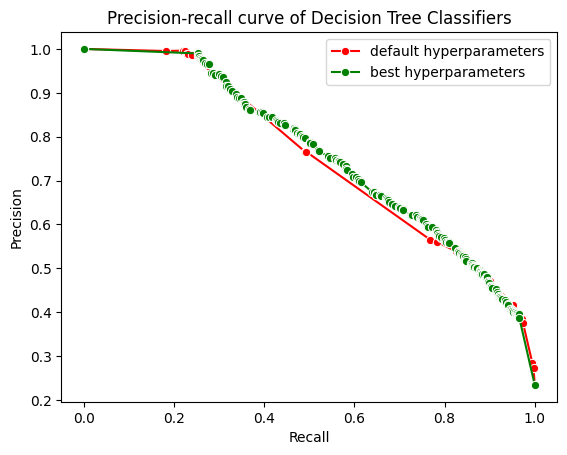

In [45]:
precision_dt_default, recall_dt_default, thresholds_dt_default = precision_recall_curve(y_test, proba_predictions_default_dt)
precision_dt_best, recall_dt_best, thresholds_dt_best = precision_recall_curve(y_test, proba_predictions_best_dt)

fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x = recall_dt_default, y = precision_dt_default, color = 'red', marker = 'o', label = 'default hyperparameters')
sns.lineplot(x = recall_dt_best, y = precision_dt_best, color = 'green', marker = 'o', label = 'best hyperparameters')

plt.title("Precision-recall curve of Decision Tree Classifiers")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

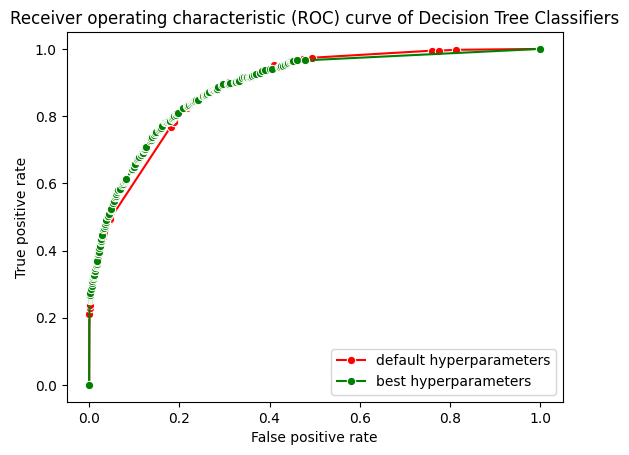

In [46]:
fpr_dt_default, tpr_dt_default, thresholds_dt_default = roc_curve(y_test, proba_predictions_default_dt)
fpr_dt_best, tpr_dt_best, thresholds_dt_best = roc_curve(y_test, proba_predictions_best_dt)

fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x = fpr_dt_default, y = tpr_dt_default, color = 'red', marker = 'o', label = 'default hyperparameters')
sns.lineplot(x = fpr_dt_best, y = tpr_dt_best, color = 'green', marker = 'o', label = 'best hyperparameters')

plt.title("Receiver operating characteristic (ROC) curve of Decision Tree Classifiers")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [47]:
# decision tree evaluation metrics

auc_dt_default = auc(fpr_dt_default, tpr_dt_default)
auc_dt_best = auc(fpr_dt_best, tpr_dt_best)

print('AUC of default DT model: ' + str(auc_dt_default))
print('AUC of DT model with best hyperparameters:' + str(auc_dt_best))
print()

print('Log loss of default DT model: ' + str(l_loss_default))
print('Log loss of DT model with best hyperparameters:' + str(l_loss_best))
print()

print('Accuracy of default DT model: ' + str(acc_score_default_dt))
print('Accuracy of DT model with best hyperparameters:' + str(acc_score_best_dt))
print()

AUC of default DT model: 0.885664712887934
AUC of DT model with best hyperparameters:0.8897934521168532

Log loss of default DT model: 0.33725967988062977
Log loss of DT model with best hyperparameters:0.6030864661094391

Accuracy of default DT model: 0.8458546571136131
Accuracy of DT model with best hyperparameters:0.8505629477993859



Based on the evaluation metrics of AUC, log loss, and accuracy scores, the tuned Decision Tree model with the best values for min_samples_leaf and max_depth hyperparameters (max_depth=20, min_samples_leaf=15) performs slightly better than the DT classifier with "default" hyperparameter values (max_depth=5, min_samples_leaf=10) when evaluating AUC and accuracy score, yet there is a noticeable difference between the log loss of the DT classifier with the best hyperparameter values and that of the default DT classifier - where the log loss of the DT classifier with the best hyperparameter values is nearly double the default classifier.

The AUC and accuracy scores of both models are comparable and pretty high (> 0.5), while the log loss is decently low for the default DT classifier (< 0.5), but slightly high for the DT classifier with the best hyperparameter values. 

I will analyze how the better model's performance is impacted by removing or adding more features to the dataset in the next code block in order to determine whether the number of features I currently have (52) maximizes the model's performance - or does there exist a better number of features I should use to improve model performance. 

In [48]:
k = 50
selector = SelectKBest(f_classif, k = k)
selector.fit(X, y)
filter = selector.get_support()
top_5_features = X.columns[filter]

print("Best " + str(k) + " features:")
print(top_5_features)

new_X_train = X_train[top_5_features]
new_X_test = X_test[top_5_features]

model = DecisionTreeClassifier(criterion='entropy', max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf)

model.fit(new_X_train, y_train)

proba_predictions = list(model.predict_proba(new_X_test)[:, 1])
l_loss = log_loss(y_test, proba_predictions)

class_label_predictions = model.predict(new_X_test)
acc_score = accuracy_score(y_test, class_label_predictions)


fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
auc_result = auc(fpr, tpr)

print()
print('AUC: ' + str(auc_result))
print()
print('Log loss: ' + str(l_loss))
print()
print('Accuracy score: ' + str(acc_score))
print()

Best 50 features:
Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country_United-States',
       'native-country_Mexico', 'native-country_Philippines',
       'native-country_Germany', 'native-country_Canada',
       'native-country_Puerto-Rico', 'native-country_El-Salvador',
       'native-country_India', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Unknown', 'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fish

### Findings of tweaking the number of features used: 

#### k = 52 (number of features I used - maximum number of features I have after dropping unncessary ones):

AUC: 0.8891993788384747

Log loss: 0.6037397912382031

Accuracy: 0.8505629477993859


#### k = 50 (decreasing number of features):

AUC: 0.8900379468976952

Log loss: 0.6025988469956406

Accuracy score: 0.8505629477993859

#### k = 47 (decreasing number of features):

AUC: 0.8898909464540083

Log loss: 0.6028259181926505

Accuracy score: 0.8505629477993859

#### k = 45 (decreasing number of features):

AUC: 0.8895607500642178

Log loss: 0.603347984873013

Accuracy score: 0.8505629477993859

#### k = 30 (decreasing number of features):

AUC: 0.88984038951031

Log loss: 0.6268412073924737

Accuracy score: 0.8497441146366428


#### k = 15 (decreasing number of features):

AUC: 0.8879097681152651

Log loss: 0.6535337075826304

Accuracy score: 0.8509723643807574

#### k = 5 (decreasing number of features):

AUC: 0.8820073325082315

Log loss: 0.33803642236211834

Accuracy score: 0.8464687819856704

### Analysis of Decision Tree Classifier: 

After tweaking the k-value (or number of features used to train the model) of the Decision Tree Classifier (with max_depth=20, min_samples_leaf=15 all throughout), I found that when the top 50 features are used to train the DT model, the model performs the best, yielding the highest AUC and a high accuracy score. 

From this, I can conclude that the best Decision Tree Classifier for this dataset is when max_depth=20, min_samples_leaf=15 and the top 50 features are used, which produces an AUC of 0.8900379468976952, log loss of 0.6025988469956406, and an accuracy score of 0.8505629477993859. 

However, this only applies in the context of Decision Tree Classifiers and I will continue training and evaluating other Classifiers to determine which Classifier model is best for this problem. 

Thus far, out of the two Classifiers I have trained and evaluated, it appears that the best Logistic Regression classifier performs slightly better than the best Decision Tree classifier, with a slightly higher AUC and accuracy score, and a noticeably smaller log loss, which is ideal. 

## Random Forest Classifier

### Training a RF model with default hyperparameter values

In [49]:
# training model with default hyperparameter values
rf_model_default = RandomForestClassifier(criterion = 'entropy')
rf_model_default.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [50]:
proba_predictions_rf_default = list(rf_model_default.predict_proba(X_test)[:, 1])
l_loss_rf_default = log_loss(y_test, proba_predictions_rf_default)

class_label_predictions_rf_default = rf_model_default.predict(X_test)
acc_score_rf_default = accuracy_score(y_test, class_label_predictions_rf_default)

# evaluate accuracy of model using confusion matrix
c_m_rf_default = confusion_matrix(y_test, class_label_predictions_rf_default, labels=[True, False])

pd.DataFrame(
c_m_rf_default,
columns=['Predicted: Income is >50K', 'Actual: Income is <=50K'],
index=['Actual: Income is >50K', 'Actual: Income is <=50K']
)

,Predicted: Income is >50K,Actual: Income is <=50K
Actual: Income is >50K,705,440
Actual: Income is <=50K,312,3428


### Training a RF model with best value for n_estimators hyperparameter

In [54]:
# using GridSearchCV to find the best hyperparameter value for n_estimators
print('Running Grid Search...')

model = RandomForestClassifier(criterion='entropy')

param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

grid = GridSearchCV(model, param_grid, cv = 5)

grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [55]:
# determining the best hyperparameter value of n_estimators

best_n_estimators = grid_search.best_estimator_.n_estimators
best_n_estimators 

70

In [61]:
# training random forest model with best hyperparameter value of n_estimators

rf_model_best = RandomForestClassifier(criterion='entropy', n_estimators = best_n_estimators)
rf_model_best.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=70)

In [65]:
proba_predictions_rf_best = list(rf_model_best.predict_proba(X_test)[:, 1])
l_loss_rf_best = log_loss(y_test, proba_predictions_rf_best)

class_label_predictions_rf_best = rf_model_best.predict(X_test)
acc_score_rf_best = accuracy_score(y_test, class_label_predictions_rf_best)

# evaluate accuracy of model using confusion matrix
c_m_rf_best = confusion_matrix(y_test, class_label_predictions_rf_best, labels=[True, False])

pd.DataFrame(
c_m_rf_best,
columns=['Predicted: Income is >50K', 'Actual: Income is <=50K'],
index=['Actual: Income is >50K', 'Actual: Income is <=50K']
)

,Predicted: Income is >50K,Actual: Income is <=50K
Actual: Income is >50K,706,439
Actual: Income is <=50K,306,3434


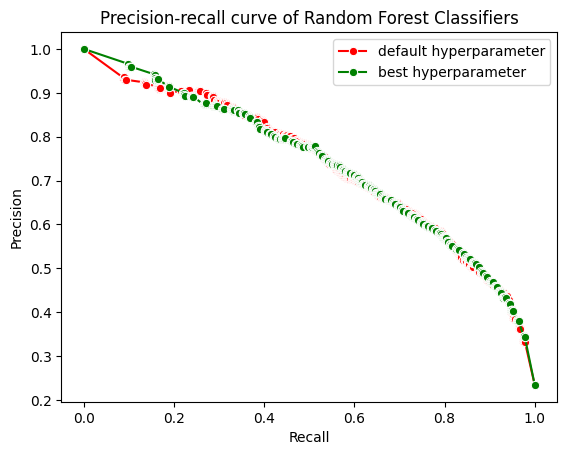

In [63]:
precision_rf_default, recall_rf_default, thresholds_rf_default = precision_recall_curve(y_test, proba_predictions_rf_default)
precision_rf_best, recall_rf_best, thresholds_rf_best = precision_recall_curve(y_test, proba_predictions_rf_best)

fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x = recall_rf_default, y = precision_rf_default, color = 'red', marker = 'o', label = 'default hyperparameter')
sns.lineplot(x = recall_rf_best, y = precision_rf_best, color = 'green', marker = 'o', label = 'best hyperparameter')

plt.title("Precision-recall curve of Random Forest Classifiers")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

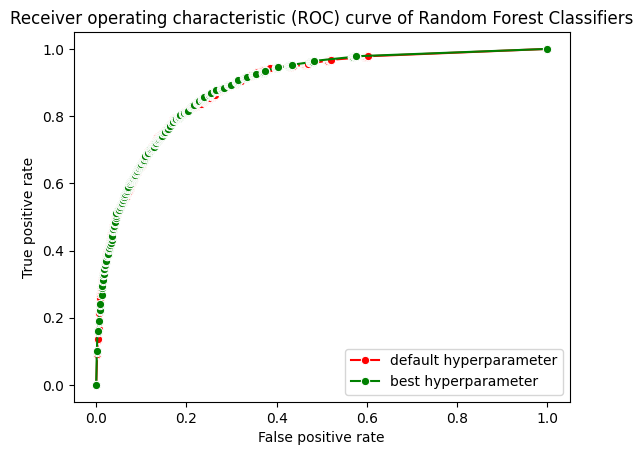

In [64]:
fpr_rf_default, tpr_rf_default, thresholds_rf_default = roc_curve(y_test, proba_predictions_rf_default)
fpr_rf_best, tpr_rf_best, thresholds_rf_best = roc_curve(y_test, proba_predictions_rf_best)

fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x = fpr_rf_default, y = tpr_rf_default, color = 'red', marker = 'o', label = 'default hyperparameter')
sns.lineplot(x = fpr_rf_best, y = tpr_rf_best, color = 'green', marker = 'o', label = 'best hyperparameter')

plt.title("Receiver operating characteristic (ROC) curve of Random Forest Classifiers")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [67]:
# Random Forest Classifier evaluation metrics

auc_rf_default = auc(fpr_rf_default, tpr_rf_default)
auc_rf_best = auc(fpr_rf_best, tpr_rf_best)

print('AUC of default RF model: ' + str(auc_rf_default))
print('AUC of RF model with best hyperparameter:' + str(auc_rf_best))
print()

print('Log loss of default RF model: ' + str(l_loss_rf_default))
print('Log loss of RF model with best hyperparameter:' + str(l_loss_rf_best))
print()

print('Accuracy of default RF model: ' + str(acc_score_rf_default))
print('Accuracy of RF model with best hyperparameter:' + str(acc_score_rf_best))
print()

AUC of default RF model: 0.8884487308222218
AUC of RF model with best hyperparameter:0.8895333115381922

Log loss of default RF model: 0.5599368820049132
Log loss of RF model with best hyperparameter:0.5380894642600581

Accuracy of default RF model: 0.8460593654042988
Accuracy of RF model with best hyperparameter:0.8474923234390993



Based on the evaluation metrics of AUC, log loss, and accuracy scores, the tuned Random Forest model with the best values for n_estimators (n_estimators = 70) performs slightly better than the RF classifier with default hyperparameter values when evaluating AUC, log loss, and accuracy. 

The AUC and accuracy scores of both models are comparable and pretty high (> 0.5), while the log loss values for both are decent (slightly > 0.5). 

I will now analyze how the better model's performance is impacted by removing or adding more features to the dataset in the next code block in order to determine whether the number of features I currently have (52) maximizes the model's performance - or does there exist a better number of features I should use to improve model performance. 

In [68]:
k = 52
selector = SelectKBest(f_classif, k = k)
selector.fit(X, y)
filter = selector.get_support()
top_5_features = X.columns[filter]

print("Best " + str(k) + " features:")
print(top_5_features)

new_X_train = X_train[top_5_features]
new_X_test = X_test[top_5_features]

model = RandomForestClassifier(criterion='entropy', n_estimators = best_n_estimators)

model.fit(new_X_train, y_train)

proba_predictions = list(model.predict_proba(new_X_test)[:, 1])
l_loss = log_loss(y_test, proba_predictions)

class_label_predictions = model.predict(new_X_test)
acc_score = accuracy_score(y_test, class_label_predictions)


fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
auc_result = auc(fpr, tpr)

print()
print('AUC: ' + str(auc_result))
print()
print('Log loss: ' + str(l_loss))
print()
print('Accuracy score: ' + str(acc_score))
print()

Best 52 features:
Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country_United-States',
       'native-country_Mexico', 'native-country_Unknown',
       'native-country_Philippines', 'native-country_Germany',
       'native-country_Canada', 'native-country_Puerto-Rico',
       'native-country_El-Salvador', 'native-country_India',
       'native-country_Cuba', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Unknown', 'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occu

### Findings of tweaking the number of features used: 

#### k = 52 (number of features I used - maximum number of features I have after dropping unncessary ones):

AUC: 0.889054713588492

Log loss: 0.5583003805122666

Accuracy score: 0.84503582395087

#### k = 50 (decreasing number of features):

AUC: 0.8877373140602012

Log loss: 0.5667099277979345

Accuracy score: 0.847697031729785

#### k = 47 (decreasing number of features):

AUC: 0.887676482264204

Log loss: 0.5915419344605582

Accuracy score: 0.8438075742067553

#### k = 45 (decreasing number of features):

AUC: 0.887097821264274

Log loss: 0.5859958024322426

Accuracy score: 0.8474923234390993

#### k = 30 (decreasing number of features):

AUC: 0.8875889125002919

Log loss: 0.6163283389013703

Accuracy score: 0.8489252814738997


#### k = 15 (decreasing number of features):

AUC: 0.8862500291899215

Log loss: 0.6683107474514004

Accuracy score: 0.8438075742067553

#### k = 5 (decreasing number of features):

AUC: 0.8851148915302525

Log loss: 0.333518624318522

Accuracy score: 0.8489252814738997

### Analysis of Random Forest Classifier: 

After tweaking the k-value (or number of features used to train the model) of the Random Forest Classifier (with criterion = 'entropy' and n_estimators = 70 all throughout), I found that when the top 5 features are used to train the RF model, the model performs the best, yielding a high AUC, the lowest log loss, and a high accuracy score, making its performance pretty balanced compared to the other models with higher k-values that have significantly higher log loss. 

From this, I can conclude that the best Random Forest Classifier for this dataset is when n_estimators = 70 and the top 5 features are used, which produces an AUC of 0.8851148915302525, log loss of 0.333518624318522, and accuracy score of 0.8489252814738997. 

However, this only applies in the context of Random Forest Classifiers and I will continue training and evaluating other Classifiers to determine which Classifier model is best for this problem. 

Thus far, out of the three Classifiers I have trained and evaluated, it appears that the best Logistic Regression classifier still performs slightly better than the best Random Forest classifier or Decision Tree classifier, with a slightly higher AUC and lower log loss than the best RF classifier.

## Gradient Boosted Decision Tree Classifier

### Training a GBDT model with default hyperparameter values

In [69]:
gbdt_model_default = GradientBoostingClassifier()

gbdt_model_default.fit(X_train, y_train)

GradientBoostingClassifier()

In [71]:
proba_predictions_gb_default = list(gbdt_model_default.predict_proba(X_test)[:, 1])
l_loss_gb_default = log_loss(y_test, proba_predictions_gb_default)

class_label_predictions_gb_default = gbdt_model_default.predict(X_test)
acc_score_gb_default = accuracy_score(y_test, class_label_predictions_gb_default)

# evaluate accuracy of model using confusion matrix
c_m_gbdt_default = confusion_matrix(y_test, class_label_predictions_gb_default, labels=[True, False])

pd.DataFrame(
c_m_gbdt_default,
columns=['Predicted: Income is >50K', 'Actual: Income is <=50K'],
index=['Actual: Income is >50K', 'Actual: Income is <=50K']
)

,Predicted: Income is >50K,Actual: Income is <=50K
Actual: Income is >50K,677,468
Actual: Income is <=50K,208,3532


### Training a GBDT model with the best n_estimators and max_depth hyperparameter values

In [72]:
print('Running Grid Search...')

model = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8]    
}

grid = GridSearchCV(model, param_grid, cv = 5)

grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [73]:
# determining the best hyperparameter value of n_estimators

best_n_estimators = grid_search.best_estimator_.n_estimators
best_max_depth = grid_search.best_estimator_.max_depth

print('Best n_estimators: ' + str(best_n_estimators))
print('Best max_depth: ' + str(best_max_depth))

Best n_estimators: 100
Best max_depth: 6


In [74]:
gbdt_model_best = GradientBoostingClassifier(n_estimators = best_n_estimators, max_depth = best_max_depth)

gbdt_model_best.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=6)

In [75]:
proba_predictions_gb_best = list(gbdt_model_best.predict_proba(X_test)[:, 1])
l_loss_gb_best = log_loss(y_test, proba_predictions_gb_best)

class_label_predictions_gb_best = gbdt_model_best.predict(X_test)
acc_score_gb_best = accuracy_score(y_test, class_label_predictions_gb_best)

# evaluate accuracy of model using confusion matrix
c_m_gbdt_best = confusion_matrix(y_test, class_label_predictions_gb_best, labels=[True, False])

pd.DataFrame(
c_m_gbdt_best,
columns=['Predicted: Income is >50K', 'Actual: Income is <=50K'],
index=['Actual: Income is >50K', 'Actual: Income is <=50K']
)

,Predicted: Income is >50K,Actual: Income is <=50K
Actual: Income is >50K,736,409
Actual: Income is <=50K,241,3499


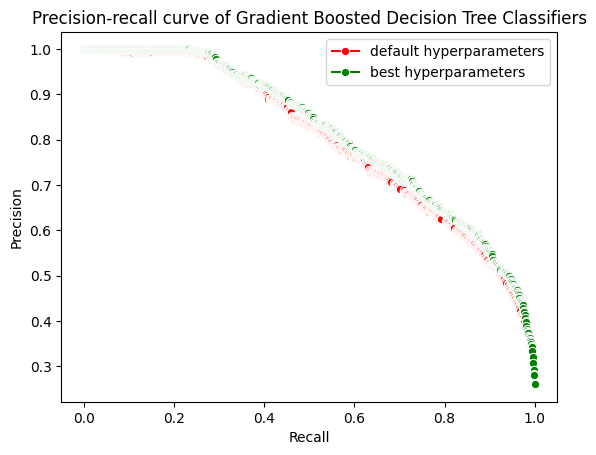

In [76]:
precision_gb_default, recall_gb_default, thresholds_gb_default = precision_recall_curve(y_test, proba_predictions_gb_default)
precision_gb_best, recall_gb_best, thresholds_gb_best = precision_recall_curve(y_test, proba_predictions_gb_best)

fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x = recall_gb_default, y = precision_gb_default, color = 'red', marker = 'o', label = 'default hyperparameters')
sns.lineplot(x = recall_gb_best, y = precision_gb_best, color = 'green', marker = 'o', label = 'best hyperparameters')

plt.title("Precision-recall curve of Gradient Boosted Decision Tree Classifiers")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

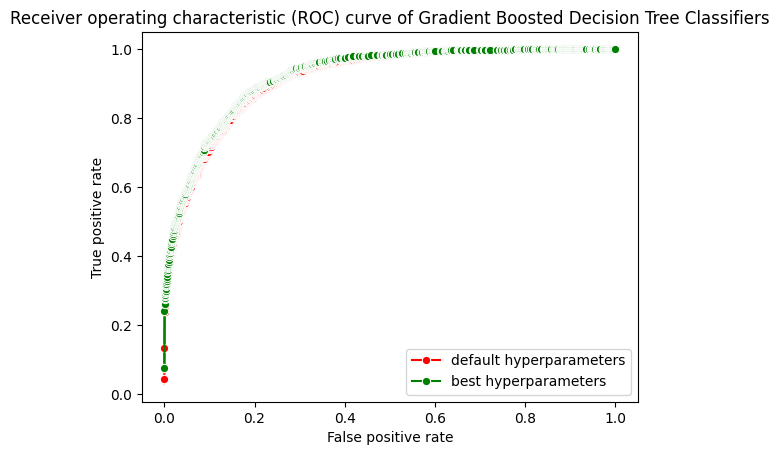

In [77]:
fpr_gb_default, tpr_gb_default, thresholds_gb_default = roc_curve(y_test, proba_predictions_gb_default)
fpr_gb_best, tpr_gb_best, thresholds_gb_best = roc_curve(y_test, proba_predictions_gb_best)

fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x = fpr_gb_default, y = tpr_gb_default, color = 'red', marker = 'o', label = 'default hyperparameters')
sns.lineplot(x = fpr_gb_best, y = tpr_gb_best, color = 'green', marker = 'o', label = 'best hyperparameters')

plt.title("Receiver operating characteristic (ROC) curve of Gradient Boosted Decision Tree Classifiers")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [78]:
# Gradient Boosted Decision Tree Classifier evaluation metrics

auc_gb_default = auc(fpr_gb_default, tpr_gb_default)
auc_gb_best = auc(fpr_gb_best, tpr_gb_best)

print('AUC of default GBDT model: ' + str(auc_gb_default))
print('AUC of GBDT model with best hyperparameters:' + str(auc_gb_best))
print()

print('Log loss of default GBDT model: ' + str(l_loss_gb_default))
print('Log loss of GBDT model with best hyperparameters:' + str(l_loss_gb_best))
print()

print('Accuracy of default GBDT model: ' + str(acc_score_gb_default))
print('Accuracy of GBDT model with best hyperparameters:' + str(acc_score_gb_best))
print()

AUC of default GBDT model: 0.9161695817668076
AUC of GBDT model with best hyperparameters:0.9232756929687317

Log loss of default GBDT model: 0.29753747587200474
Log loss of GBDT model with best hyperparameters:0.28334413853860785

Accuracy of default GBDT model: 0.8616171954964176
Accuracy of GBDT model with best hyperparameters:0.8669396110542477



Based on the evaluation metrics of AUC, log loss, and accuracy scores, the tuned Gradient Boosted Decision Tree model with the best values for n_estimators and max_depth hyperparameters (n_estimators = 100, which also happens to be the default n_estimators value, and max_depth = 6) performs better than the GBDT classifier with default hyperparameter values when evaluating all evaluation metrics.

The AUC and accuracy scores of both models are comparable and pretty high (being the highest AUC and accuracy scores of all the classifiers I have trained), while the log loss values for both are decently low and the lowest of all the classifiers trained up to this point. 

I will now analyze how the better model's performance is impacted by removing or adding more features to the dataset in the next code block in order to determine whether the number of features I currently have (52) maximizes the model's performance - or does there exist a better number of features I should use to improve model performance.  

In [79]:
k = 50
selector = SelectKBest(f_classif, k = k)
selector.fit(X, y)
filter = selector.get_support()
top_5_features = X.columns[filter]

print("Best " + str(k) + " features:")
print(top_5_features)

new_X_train = X_train[top_5_features]
new_X_test = X_test[top_5_features]

model = RandomForestClassifier(criterion='entropy', n_estimators = best_n_estimators)

model.fit(new_X_train, y_train)

proba_predictions = list(model.predict_proba(new_X_test)[:, 1])
l_loss = log_loss(y_test, proba_predictions)

class_label_predictions = model.predict(new_X_test)
acc_score = accuracy_score(y_test, class_label_predictions)


fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
auc_result = auc(fpr, tpr)

print()
print('AUC: ' + str(auc_result))
print()
print('Log loss: ' + str(l_loss))
print()
print('Accuracy score: ' + str(acc_score))
print()

Best 50 features:
Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country_United-States',
       'native-country_Mexico', 'native-country_Philippines',
       'native-country_Germany', 'native-country_Canada',
       'native-country_Puerto-Rico', 'native-country_El-Salvador',
       'native-country_India', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Unknown', 'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fish

### Findings of tweaking the number of features used: 

#### k = 52 (number of features I used - maximum number of features I have after dropping unncessary ones):

AUC: 0.9234405576442566

Log loss: 0.28315057269897215

Accuracy: 0.8665301944728762

#### k = 50 (decreasing number of features):

AUC: 0.8897152231277585

Log loss: 0.5309730428690449

Accuracy score: 0.8491299897645854

#### k = 47 (decreasing number of features):

AUC: 0.8887291875861103

Log loss: 0.5400125363997823

Accuracy score: 0.8448311156601842

#### k = 45 (decreasing number of features):

AUC: 0.8892214464189804

Log loss: 0.5264197033390292

Accuracy score: 0.8433981576253838

#### k = 30 (decreasing number of features):

AUC: 0.8904707750507903

Log loss: 0.49924228223838085

Accuracy score: 0.8462640736949847


#### k = 15 (decreasing number of features):

AUC: 0.8872513602503328

Log loss: 0.5930343161436332

Accuracy score: 0.8438075742067553

#### k = 5 (decreasing number of features):

AUC: 0.8855714218994466

Log loss: 0.33325570864485615

Accuracy score: 0.8491299897645854

### Analysis of Gradient Boosted Decision Tree Classifier: 

After tweaking the k-value (or number of features used to train the model) of the Gradient Boosted Decision Tree Classifier (with n_estimators = 100 and max_depth = 6 all throughout), I found that when the top 52 features - all the features in the processed census dataset - are used to train the GBDT model, the model performs the best, yielding the highest AUC and accuracy score and lowest log loss. 

From this, I can conclude that the best GBDT for this dataset is when n_estimators = 100, max_depth = 6, and all 52 features in the dataset are used, which produces an AUC of 0.9234405576442566, log loss of 0.28315057269897215, and accuracy score of 0.8665301944728762. 

Thus far, out of all the four Classifiers I trained and evaluated, the evaluation metrics demonstrate that the best Gradient Boosted Decision Tree classifier performs the best, with the highest AUC, lowest log loss, and highest accuracy score.

# Lab 8 Overall Analysis

To recap this lab, I selected the Census dataset for this supervised Machine Learning problem, with the goal of predicting whether a person's income was over 50K, based on a variety of features - like 'age', 'education-num', 'occupation', 'native-country', and 'marital-status' just to name a few. The dataset initially had a column called 'income_binary', but I updated it accordingly and renamed it to 'income_over_50K' to represent in boolean values whether a person made over 50K.

Prior to training my different classifiers, I performed data preprocessing and feature engineering techniques to remove irrelevant features (including 'race' and 'sex_selfID' that could make the models biased and 'fnlwgt' that just represented a person's identification number), address missing values, winsorize outliers, and scale numerical data. After this process was complete, I began training my models; in this problem, I opted to train and evaluate four different classifiers - Logisitic Regression, Decision Tree, Random Forest, and Gradient Boosted Decision Tree - to analyze the performance across all and see which one performed the best. For each classifier, I trained two: the first one being the classifier with default hyperparameter values, and the second being the classifier with the best hyperparameter values, derived from GridSearchCV. 

For all 4 types of the classifiers I trained, I found that the classifiers with the best hyperparameter value(s) performed slightly better than default classifier, using AUC, log loss, and accuracy score as evaluation metrics - though the differences in these metrics between the two classifiers were often extremely small. 

After finding the AUC, log loss, and accuracy scores of the classifiers, I tweaked the number of features I used to determine if using the top k features would improve or decrease model performance. The results were different across the different classifiers, but most of the classifiers except the Random Forest seemed to perform best when most of the features in the processed dataset were used. For the Gradient Boosted Decision Tree classifier, it was the only classifier to perform the best when all its features were used. 

In addition, the top 5 features that held the most weight on the model always seemed to be 'age', 'education-num', 'capital-gain', 'capital-loss', and 'hours-per-week' - which makes sense since all of these are relevant pieces of information to determining how much someone gets paid. 

Ultimately, after training and evaluating all the classifiers, I performed model selection by comparing the AUC, log loss, and accuracy scores against each other and found that the model that performed the best across the board was the Gradient Boosted Decision Tree classifier, when all features in the census dataset were used and when n_estimators = 100 and max_depth = 6. 

In conclusion, the model that generalized the best to the testing data in this problem was the Gradient Boosted Decision Tree classifier, achieving an AUC of 0.9234405576442566, log loss of 0.28315057269897215, and accuracy score of 0.8665301944728762, demonstrating the strength of this model. 